<a href="https://colab.research.google.com/github/Om-2001/Web_Scraping_Internshala/blob/main/Internshala_Web_Scraping_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def get_title(new_soup):
  try:
    result = new_soup.find("div", attrs={'class':"heading_2_4 heading_title"}).text.strip()
  except:
    result = np.nan
  return result

def get_role(new_soup):
  try:
    result = new_soup.find("span", attrs={"class":"profile_on_detail_page"}).text.strip()
  except:
    result = np.nan
  return result

def get_company(new_soup):
  try:
    result = new_soup.find("a", attrs={'class':"link_display_like_text view_detail_button"}).text.strip()
  except:
    result = np.nan
  return result

def get_location(new_soup):
  try:
    result = new_soup.find("a", attrs={"class":"location_link view_detail_button"}).text.strip()
  except:
    result = np.nan
  return result

def get_ctc(new_soup):
  try:
    result = new_soup.find("span", attrs={"class":"desktop"}).text.strip()
  except:
    result = np.nan
  return result

def get_exp(new_soup):
  try:
    result = new_soup.find("div", attrs={'class':"item_body desktop-text"}).text.strip()
  except:
    result = np.nan
  return result

def get_skills(new_soup):
  try:
    result = new_soup.find("div", attrs={"class":"round_tabs_container"}).text.strip().replace('\n', ',')
  except:
    result = np.nan
  return result

# USING "INTERNSHALA AS A SOURCE"

**https://internshala.com/jobs/**

Targeted Keywords : data analysis, data science

In [ ]:
HEADERS = ({'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36', 'Accept-Language':'en-US, en;q=0.5'})

d = {
    "Title":[],
    "Role":[],
    "Company":[],
    "Location":[],
    "Ctc":[],
    "Experience":[],
    "Skills":[]
}

for i in range(1, 4):
  URL = f'https://internshala.com/jobs/data-analysis,data-science-jobs/page-{i}/'
  soup = BeautifulSoup(requests.get(URL, headers=HEADERS).content, 'html.parser')
  list_links = soup.find_all("a", attrs={"class":"view_detail_button"})
  for link in list_links:
    full_link = 'https://internshala.com' + link.get('href')
    new_soup = BeautifulSoup(requests.get(full_link, headers=HEADERS).content, 'html.parser')

    d['Title'].append(get_title(new_soup))
    d['Role'].append(get_role(new_soup))
    d['Company'].append(get_company(new_soup))
    d['Location'].append(get_location(new_soup))
    d['Ctc'].append(get_ctc(new_soup))
    d['Experience'].append(get_exp(new_soup))
    d['Skills'].append(get_skills(new_soup))


In [ ]:
jobs = pd.DataFrame(d)
jobs = jobs[~jobs["Title"].isnull()]

In [ ]:
jobs.to_csv('jobs_on_internshala.csv')

In [ ]:
jobs.sample(5)

,Title,Role,Company,Location,Ctc,Experience,Skills
284,Business Analyst Job in Chennai at Colan Infot...,Business Analyst,Colan Infotech Private Limited,Chennai,Competitive salary,4-6 years,NaN
251,Research & Mapping Associate Job in Mumbai at ...,Research & Mapping Associate,Qrata,Mumbai,"₹ 2,00,000 - 4,50,000",0-2 years,"Business Research,Data Analysis,MS-Excel"
302,Junior Associate Job in Delhi at Skidos,Junior Associate,Skidos,Delhi,"₹ 2,00,000 - 2,40,000",0-2 years,"Data Analysis,Golang,Manual Testing,Node.js,Pr..."
129,Revenue Associate Job in Pune at Atica Global,Revenue Associate,Atica Global,Pune,"₹ 4,00,000 - 4,80,000",0-2 years,Effective Communication
210,Junior Machine Learning Associate Job in Multi...,Junior Machine Learning Associate,Mentorrbuddy,Pune,"₹ 2,00,000 - 2,10,000",0-2 years,"Data Analytics,Data Science,Deep Learning,Mach..."


In [ ]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 349
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       111 non-null    object
 1   Role        111 non-null    object
 2   Company     111 non-null    object
 3   Location    111 non-null    object
 4   Ctc         111 non-null    object
 5   Experience  111 non-null    object
 6   Skills      96 non-null     object
dtypes: object(7)
memory usage: 6.9+ KB


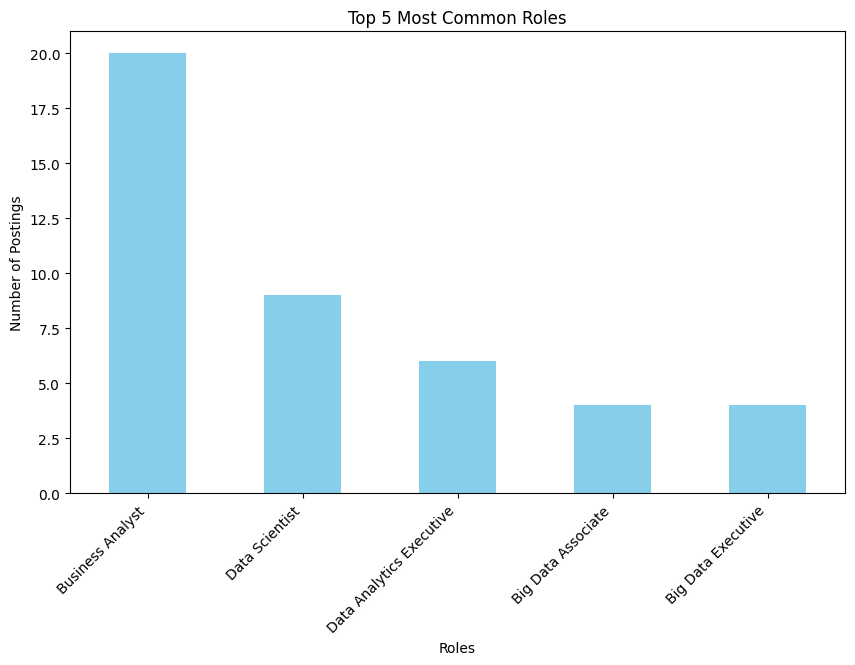

In [ ]:
# Plot 1: Most common roles
plt.figure(figsize=(10, 6))
jobs['Role'].value_counts().head().plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Common Roles')
plt.xlabel('Roles')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

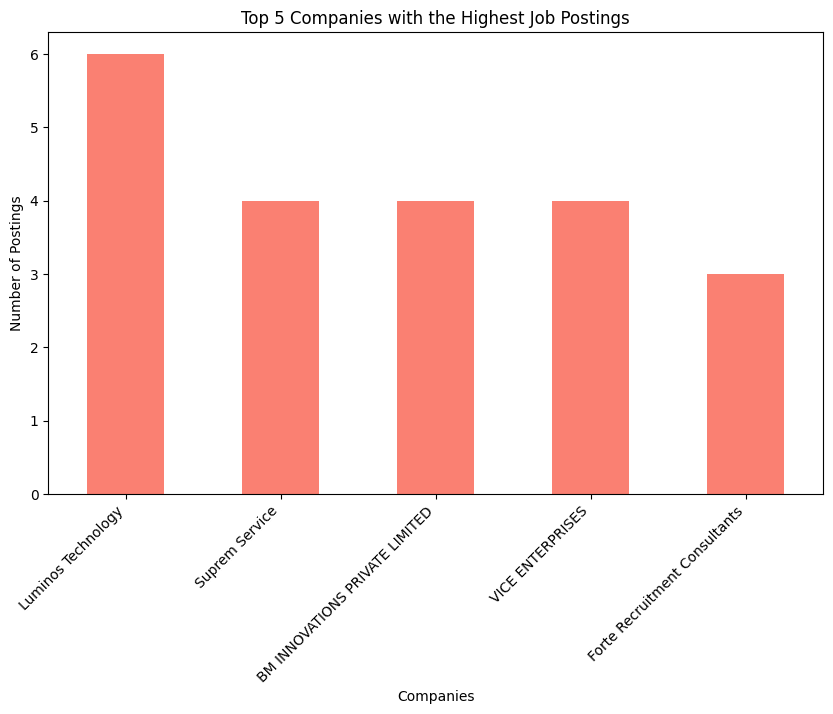

In [ ]:
# Plot 2: Companies with the highest number of job postings
plt.figure(figsize=(10, 6))
jobs['Company'].value_counts().head().plot(kind='bar', color='salmon')
plt.title('Top 5 Companies with the Highest Job Postings')
plt.xlabel('Companies')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

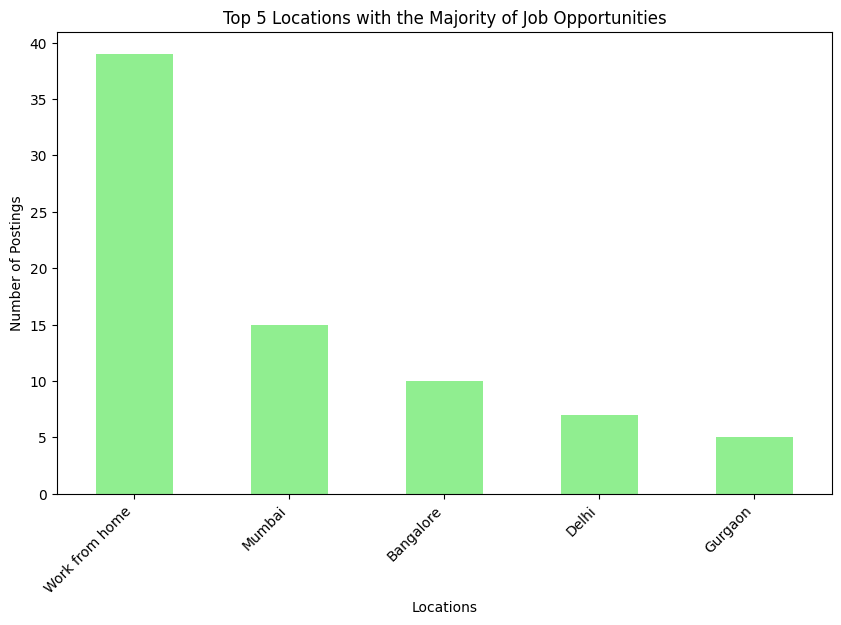

In [ ]:
# Plot 3: Locations with the majority of job opportunities
plt.figure(figsize=(10, 6))
jobs['Location'].value_counts().head().plot(kind='bar', color='lightgreen')
plt.title('Top 5 Locations with the Majority of Job Opportunities')
plt.xlabel('Locations')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45, ha='right')
plt.show()